In [12]:
# Import libraries
import pandas as pd
import numpy as np
import itertools
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from matplotlib.pyplot import figure

from scipy.stats import t

In [61]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
#hapus data duplicate
df.drop_duplicates(inplace=True)

In [16]:
#hapus null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

ANALISA DESKRPTIF

In [17]:
#analisa deskriptif
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
#variabel kategorik
df.describe(include=['O'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [19]:
#rata-rata umur
mean_umur = df["age"].mean()

print(f"Rata-rata umur pada data adalah {mean_umur:.0f} tahun")

Rata-rata umur pada data adalah 39 tahun


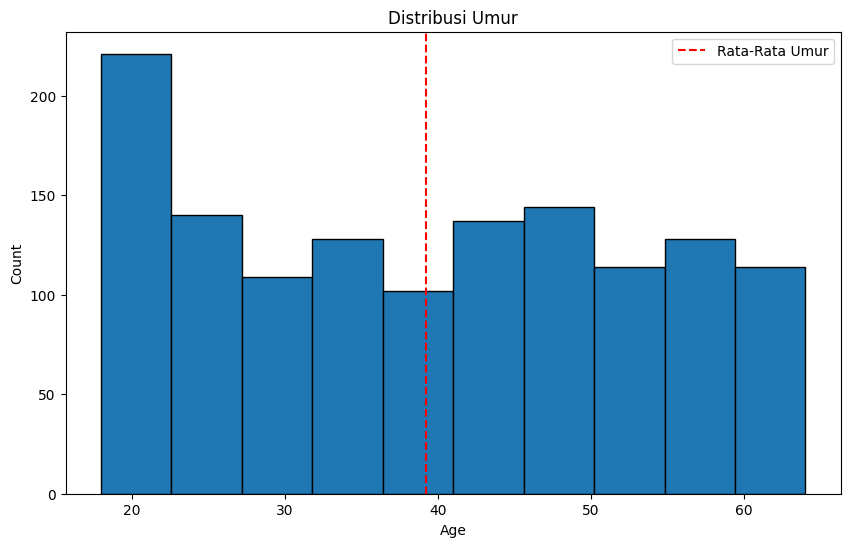

In [20]:
# Visualisasi dengan Matplotlib
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.axvline(mean_umur, color='red', linestyle='dashed', linewidth=1.5, label='Rata-Rata Umur')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribusi Umur')
plt.legend()
plt.show()

In [21]:
# rata-rata nilai BMI
mean_bmi = df['bmi'].mean()

print(f"Rata-rata nilai BMI dari data: {mean_bmi:.2f}")

Rata-rata nilai BMI dari data: 30.66


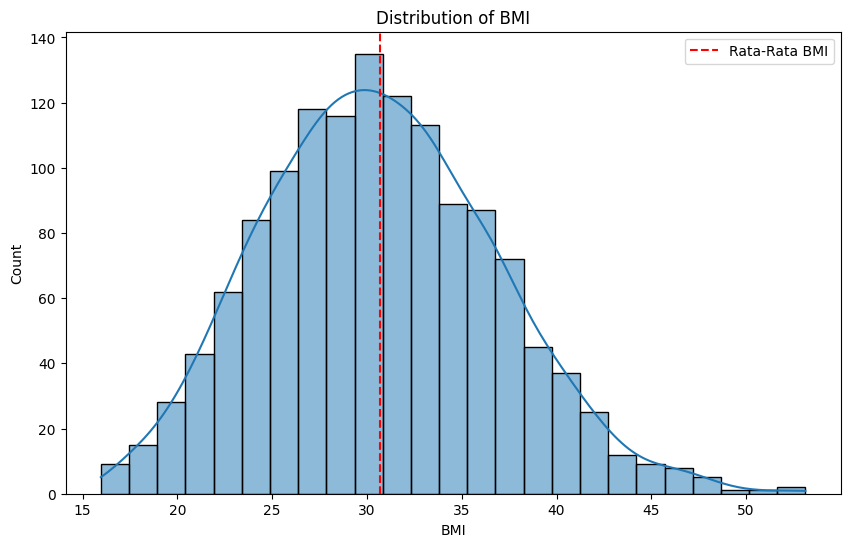

In [22]:
# Visualisasi dengan Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bmi', kde=True)
plt.axvline(mean_bmi, color='red', linestyle='dashed', linewidth=1.5, label='Rata-Rata BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.legend()
plt.show()

In [23]:
# Menghitung median dari tagihan
median_charges = df['charges'].median()

print(f"Median tagihan dari data: {median_charges:.2f}")

Median tagihan dari data: 9386.16


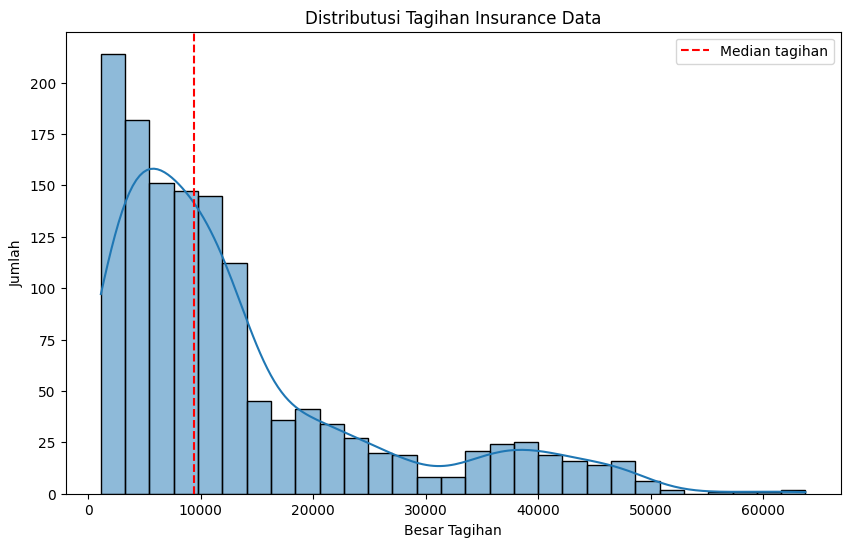

In [24]:
# Visualisasi dengan Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='charges', kde=True)
plt.axvline(median_charges, color='red', linestyle='dashed', linewidth=1.5, label='Median tagihan')
plt.xlabel('Besar Tagihan')
plt.ylabel('Jumlah')
plt.title('Distributusi Tagihan Insurance Data')
plt.legend()
plt.show()

In [25]:
#jumlah pria & wanita
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [26]:
#jumlah perokok
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

ANALISIS VARIABEL DISKRIT

In [27]:
# tagihan tertinggi berdasarkan gender
tagihan_maks = df.groupby('sex')['charges'].max()
gender_tertinggi = tagihan_maks.idxmax()

print(f"Gender dengan tagihan paling tinggi adalah: {gender_tertinggi}")

Gender dengan tagihan paling tinggi adalah: female


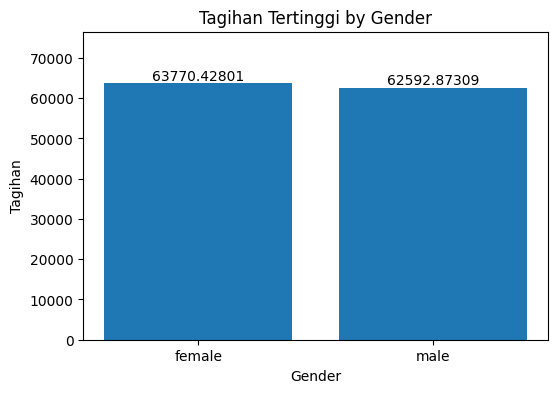

In [29]:
# Membuat bar plot
plt.figure(figsize=(6,4))
plt.bar(tagihan_maks.index, tagihan_maks.values)
plt.xlabel('Gender')
plt.ylabel('Tagihan')
plt.title('Tagihan Tertinggi by Gender')
plt.ylim([0, max(tagihan_maks.values) * 1.2 ])

# Menambahkan label nilai di atas setiap bar
for i, value in enumerate(tagihan_maks.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

#plt.savefig("img/tagihan-bygender.jpeg")
plt.show()

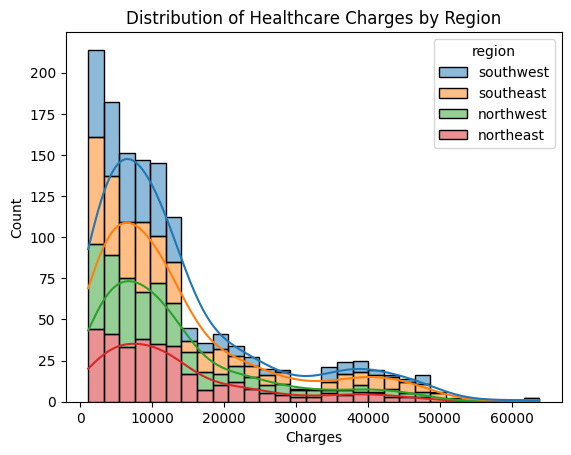

In [30]:
#Distribusi tagihan di tiap-tiap region?
sns.histplot(data=df, x='charges', hue='region', multiple='stack', kde=True)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Healthcare Charges by Region')
plt.show()

In [34]:
# jumlah data dalam setiap region
region_counts = df['region'].value_counts()
region_counts/len(df)

region
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: count, dtype: float64

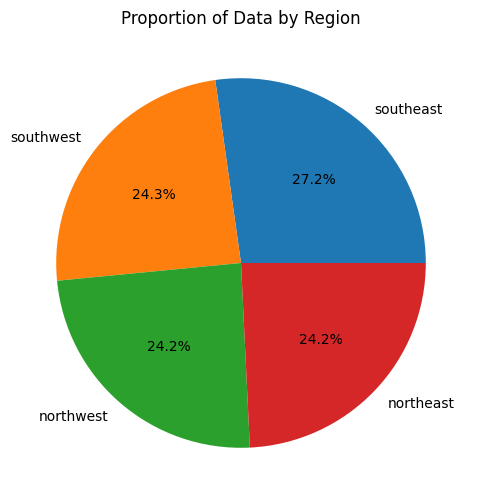

In [35]:
# piechart proporsi data dalam setiap region
plt.figure(figsize=(6,6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Data by Region')
plt.show()

In [36]:
# jumlah individu perokok dan non-perokok
smoker_counts = df['smoker'].value_counts()
smoker_counts/len(df)

smoker
no     0.795064
yes    0.204936
Name: count, dtype: float64

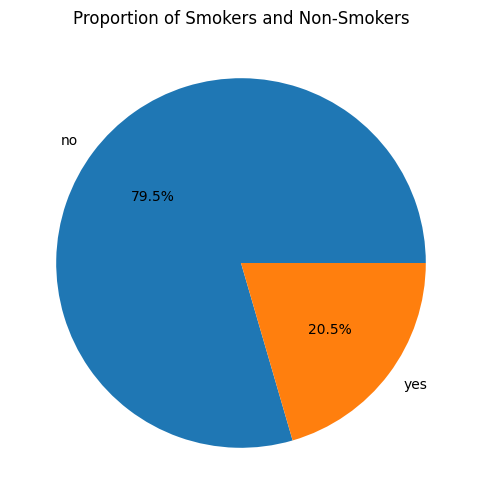

In [37]:
# visualisasi proporsi perokok dan non-perokok
plt.figure(figsize=(6,6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Smokers and Non-Smokers')
plt.show()

 Berapa peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok?

In [38]:

# Menghitung jumlah individu perokok yang perempuan
perokok_perempuan = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')].shape[0]
print(f"Jumlah perokok perempuan: {perokok_perempuan}")

# Menghitung total jumlah individu perokok
total_perokok = df[df['smoker'] == 'yes'].shape[0]
print(f"Jumlah total perokok: {total_perokok}")

# Menghitung peluang seseorang adalah perempuan jika diketahui dia adalah perokok
peluang_perempuan_perokok = perokok_perempuan / total_perokok

print(f"Peluang seseorang adalah perempuan jika diketahui dia adalah perokok: {peluang_perempuan_perokok:.2f}")

Jumlah perokok perempuan: 115
Jumlah total perokok: 274
Peluang seseorang adalah perempuan jika diketahui dia adalah perokok: 0.42


 Berapa peluang seseorang tersebut adalah laki-laki jika diketahui dia adalah perokok?

In [39]:

# Menghitung jumlah individu perokok yang perempuan
perokok_laki_laki = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')].shape[0]
print(f"Jumlah perokok laki-laki: {perokok_laki_laki}")

# Menghitung total jumlah individu perokok
total_perokok = df[df['smoker'] == 'yes'].shape[0]
print(f"Jumlah total perokok: {total_perokok}")

# Menghitung peluang seseorang adalah perempuan jika diketahui dia adalah perokok
peluang_perempuan_perokok = perokok_laki_laki / total_perokok

print(f"Peluang seseorang adalah perempuan jika diketahui dia adalah perokok: {peluang_perempuan_perokok:.2f}")

Jumlah perokok laki-laki: 159
Jumlah total perokok: 274
Peluang seseorang adalah perempuan jika diketahui dia adalah perokok: 0.58


Analisa Variabel kontinu
a. Mana yang lebih mungkin terjadi:
1) Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k, atau
2) Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k

In [42]:
# proporsi data dengan BMI di atas 25 dan tagihan di atas 16.7k
proporsi_overweight = len(df[(df['bmi'] > 25) & (df['charges'] > 16700)]) / len(df)


# proporsi data dengan BMI di bawah 25 dan tagihan di atas 16.7k
proporsi_normal_weight = len(df[(df['bmi'] < 25) & (df['charges'] > 16700)]) / len(df)

print(f"Proporsi data dengan BMI di atas 25 dan tagihan di atas 16.7k: {proporsi_overweight:.2f}")
print(f"Proporsi data dengan BMI di bawah 25 dan tagihan di atas 16.7k: {proporsi_normal_weight:.2f}")

Proporsi data dengan BMI di atas 25 dan tagihan di atas 16.7k: 0.21
Proporsi data dengan BMI di bawah 25 dan tagihan di atas 16.7k: 0.04


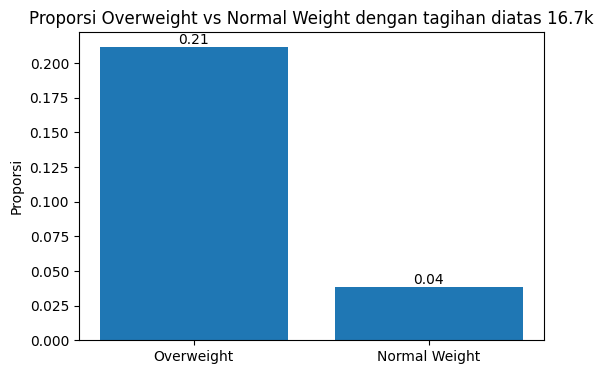

In [43]:
labels = ['Overweight', 'Normal Weight']
sizes = [proporsi_overweight, proporsi_normal_weight]
x = range(len(labels))

plt.figure(figsize=(6,4))
plt.bar(x, sizes)
plt.xticks(x, labels)
plt.ylabel('Proporsi')
plt.title('Proporsi Overweight vs Normal Weight dengan tagihan diatas 16.7k')

plt.text(0, proporsi_overweight, '{:.2f}'.format(proporsi_overweight), ha='center', va='bottom')
plt.text(1, proporsi_normal_weight, '{:.2f}'.format(proporsi_normal_weight), ha='center', va='bottom')

plt.show()

proporsi_overweight lebih tinggi, maka kondisi "seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7k" lebih mungkin terjadi.

b. Mana yang lebih mungkin terjadi:
1) Seseorang perokok mendapatkan tagihan kesehatan diatas 16,7k, atau
2) Seseorang non perokok mendapatkan tagihan kesehatan diatas 16,7k
Untuk menentukan mana yang lebih mungkin terjadi antara dua kondisi yang diberikan, kita dapat menghitung proporsi data yang memenuhi setiap kondisi. Berikut adalah contoh kode untuk menghitung proporsi data yang memenuhi setiap kondisi:

In [44]:
# Menghitung proporsi data perokok dan tagihan di atas 16.7k
smokers_a = len(df[(df['smoker'] == 'yes') & (df['charges'] > 16700)]) / len(df)

# Menghitung proporsi data non perokok dan tagihan di atas 16.7k
non_smokers_b = len(df[(df['smoker'] == 'no') & (df['charges'] > 16700)]) / len(df)

print(f"Proporsi data perokok dan tagihan di atas 16.7k: {smokers_a:.2f}")
print(f"Proporsi data non perokok dan tagihan di atas 16.7k: {non_smokers_b:.2f}")

Proporsi data perokok dan tagihan di atas 16.7k: 0.19
Proporsi data non perokok dan tagihan di atas 16.7k: 0.06


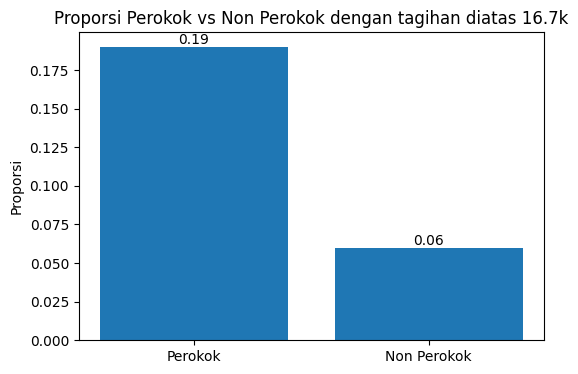

In [45]:
labels = ['Perokok', 'Non Perokok']
sizes = [smokers_a, non_smokers_b]
x = range(len(labels))

plt.figure(figsize=(6,4))
plt.bar(x, sizes)
plt.xticks(x, labels)
plt.ylabel('Proporsi')
plt.title('Proporsi Perokok vs Non Perokok dengan tagihan diatas 16.7k')

plt.text(0, smokers_a, '{:.2f}'.format(smokers_a), ha='center', va='bottom')
plt.text(1, non_smokers_b, '{:.2f}'.format(non_smokers_b), ha='center', va='bottom')
plt.show()

ANALISA KORELASI VARIABEL



1. Korelasi antara Tagihan dengan variabel usia (age), gender (sex), BMI (bmi), dan jumlah anak (children).

In [49]:
pip install statsmodels


     ---------------------------------------- 9.8/9.8 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# Import libraries
import pandas as pd
import numpy as np
import itertools
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

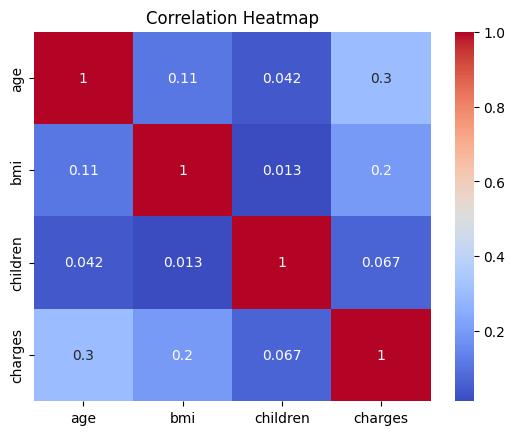

In [57]:
# Menghitung korelasi antara tagihan dan variabel-variabel lainnya
correlation = df[['age', 'bmi', 'children', 'charges']].corr()

# Memvisualisasikan korelasi dengan heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
#plt.savefig("img/korelasi-heatmap.jpeg")
plt.show()

PENGUJIAN HIPOTESIS

1. Apakah rata-rata tagihan perokok lebih besar daripada tagihan non perokok?

H0: Rata-rata tagihan perokok = rata-rata tagihan non-perokok.

H1: Rata-rata tagihan perokok > daripada rata-rata tagihan non-perokok.

In [58]:
# Membagi dataset menjadi kelompok perokok dan non-perokok
perokok = df[df['smoker'] == 'yes']['charges']
non_perokok = df[df['smoker'] == 'no']['charges']

# Melakukan uji t independen
t_statistic, p_value = stats.ttest_ind(perokok, non_perokok, alternative='greater')

# Tingkat signifikansi
alpha = 0.05  

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Rata-rata tagihan perokok lebih besar daripada tagihan non-perokok.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa rata-rata tagihan perokok ")

t-statistic: 46.64479459840305
p-value: 7.033610474688249e-283
Hipotesis nol ditolak. Rata-rata tagihan perokok lebih besar daripada tagihan non-perokok.


2. Apakah Proporsi perokok laki-laki lebih besar dari perempuan?

H0: Proporsi perokok laki-laki <= proporsi perokok perempuan.

H1: Proporsi perokok laki-laki > proporsi perokok perempuan

In [59]:
# Menghitung jumlah perokok laki-laki
jumlah_perokok_laki = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')].shape[0]

# Menghitung jumlah perokok perempuan
jumlah_perokok_perempuan = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')].shape[0]

# Menghitung total perokok
total_perokok = jumlah_perokok_laki + jumlah_perokok_perempuan

# Melakukan uji proporsi
count = [jumlah_perokok_laki, jumlah_perokok_perempuan]
nobs = [total_perokok, total_perokok]
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

# Tingkat signifikansi
alpha = 0.05  

print("z-statistic:", z_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa proporsi perokok laki-laki.")

z-statistic: 3.759173693953749
p-value: 8.523772937514337e-05
Hipotesis nol ditolak. Proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.


3. Apakah Variasi tagihan kesehatan perokok dan non perokok sama

H0: Variansi tagihan kesehatan perokok sama dengan variansi tagihan kesehatan non-perokok.

H1: Variansi tagihan kesehatan perokok tidak sama dengan variansi tagihan kesehatan non-perokok.

In [60]:
# Mengambil data tagihan perokok dan non-perokok
tagihan_perokok = df[df['smoker'] == 'yes']['charges']
tagihan_non_perokok = df[df['smoker'] == 'no']['charges']

# Melakukan uji F-test
f_statistic, p_value = stats.f_oneway(tagihan_perokok, tagihan_non_perokok)

# Tingkat signifikansi
alpha = 0.05  

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Variansi tagihan kesehatan perokok tidak sama dengan variansi tagihan kesehatan non-perokok.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa variansi tagihan kesehatan perokok sama dengan variansi tagihan kesehatan non-perokok.")

F-statistic: 2175.7368631272116
p-value: 1.4067220949358597e-282
Hipotesis nol ditolak. Variansi tagihan kesehatan perokok tidak sama dengan variansi tagihan kesehatan non-perokok.
